<a href="https://colab.research.google.com/github/tasyasvdh09/PCVK_Genap_2023/blob/main/PCVK_UTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
#import folder yang ada di drive

from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
# Import library
import cv2
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

In [13]:
#read image
img = cv2.imread('/content/drive/MyDrive/PCVK/images/sawah.jpg')
img2 = cv2.imread('/content/drive/MyDrive/PCVK/images/sawah.jpg', cv2.IMREAD_GRAYSCALE)

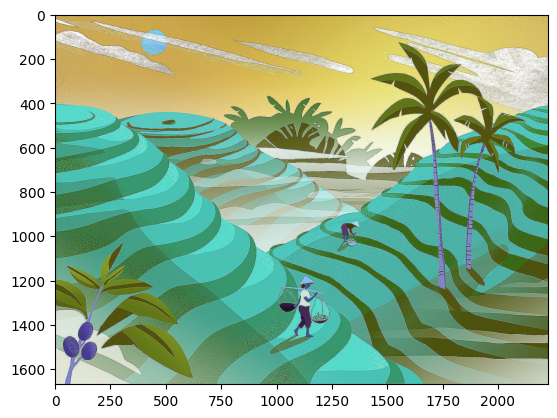

In [14]:
# sharpening
kernel_sharpening = np.array([[-1,-1,-1],
                              [-1,9,-1],
                              [-1,-1,-1]])

sharpened_img = cv2.filter2D(img, -1, kernel_sharpening)
plt.imshow(sharpened_img, cmap='gray', vmin=0, vmax=255)

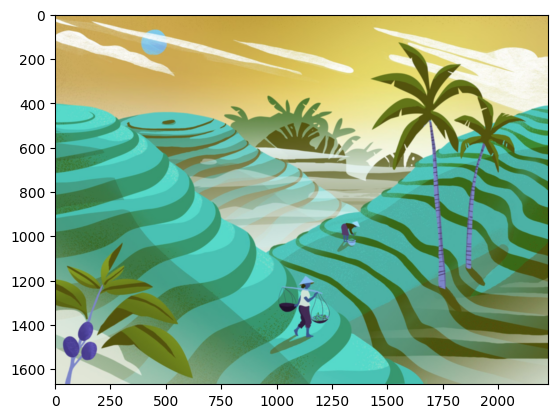

In [15]:
# blurring
kernel_blurring = np.ones((5,5),np.float32)/25
blurred_img = cv2.filter2D(img,-1,kernel_blurring)
plt.imshow(blurred_img, cmap='gray', vmin=0, vmax=255)

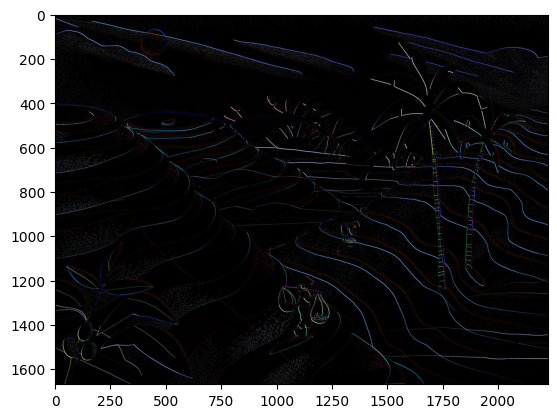

In [16]:
# emboss
kernel_emboss = np.array([[0,-1,-1],
                          [1,0,-1],
                          [1,1,0]])

embossed_img = cv2.filter2D(img, -1, kernel_emboss)
plt.imshow(embossed_img, cmap='gray', vmin=0, vmax=255)

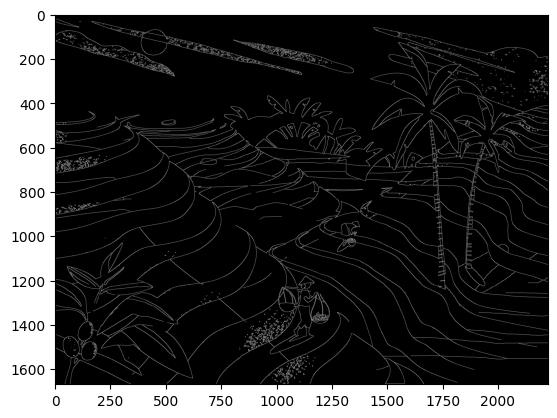

In [17]:
# edge detection
canny_img = cv2.Canny(img2, 100, 200)
plt.imshow(canny_img, cmap='gray', vmin=0, vmax=255)

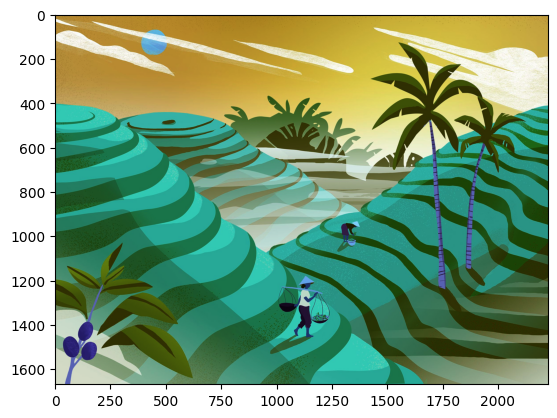

In [18]:
# gamma correction
gamma = 1.5
gamma_corr = np.power((img / 255.0), gamma)
gamma_corr = np.uint8(gamma_corr * 255)
plt.imshow(gamma_corr, cmap='gray', vmin=0, vmax=255)

Jumlah Citra di Average = 40
Nilai PSNR = 50 dB


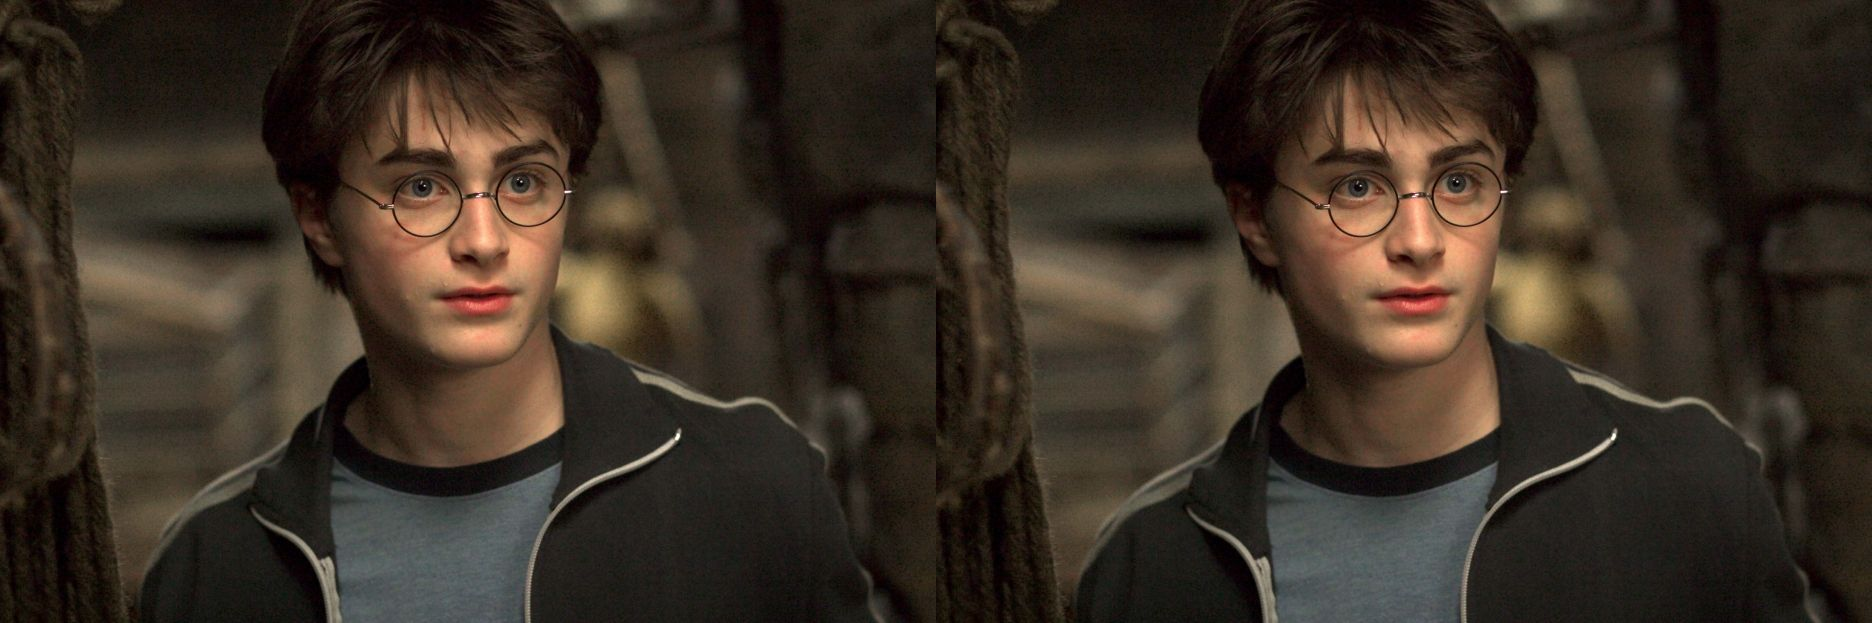

In [19]:
import glob
from math import log10, sqrt

original = cv.imread('/content/drive/MyDrive/PCVK/images/harrypotter.jpg')

cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/images/harrys/*.jpg'):
  n = cv.imread(img)
  cv_img.append(n)

noise_image = cv_img[39]

for i in range(39):
  alpha = 1.0 / (i + 1)
  beta = 1.0 - alpha
  noise_image = cv.addWeighted(cv_img[i], alpha, noise_image, beta, 0.0)

def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):  
        return 50
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr 
  
compressed = noise_image
psnr = PSNR(original, compressed)
print('Jumlah Citra di Average = 40')
print('Nilai PSNR =', psnr, 'dB')

final_frame = cv.hconcat((original, noise_image))
cv2_imshow(final_frame)